<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_sdc.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Región de interés en un video </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/video.png" align="middle" style="width:550px;"/></td>
<td>

En esta lección aplicaremos funciones de **OpenCV** para llevar a cabo la lectura de un vídeo, además de seleccionar y mostrar la región de interés de un camino.
   
<br>
</td>
</tr>
</table>

# Cargar librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import time

# Cargar el video

In [2]:
#Una vez abierto el video, es necesario presionar "q" para cerrarlo
video = cv.VideoCapture("videos/video_carretera.mp4")

cv.startWindowThread()
while(video.isOpened()):
    ret, frame = video.read()
    alto= frame.shape[0]
    ancho= frame.shape[1]
    ratio=0.8
    frame =cv.resize(frame, ( int(ancho*ratio) , int(alto*ratio) ), interpolation=cv.INTER_NEAREST )
    time.sleep(0.002) #Variar la velocidad de reproducción del vídeo
    #print(ret)
    if ret:
        cv.imshow("video_original", frame)   
        if cv.waitKey(1) & 0xFF == ord('q'):
            print('q')
            break
    else:
        break

cv.waitKey(5000)
cv.destroyWindow('video_original')
        
cv.waitKey(1)

cv.destroyAllWindows()

cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)


video.release()

cv.waitKey(1)


AttributeError: 'NoneType' object has no attribute 'shape'

# Guardar los 3 primeros frames

In [3]:
cap= cv.VideoCapture("videos/video_carretera.mp4")
i=0
while(cap.isOpened() and i<3):
    ret, frame = cap.read()
    if ret == False:
        break
    cv.imwrite('figuras/imagen_'+str(i)+'.jpg',frame)
    i+=1

cap.release()
cv.destroyAllWindows()

# Aplicar la función de binarización 

In [4]:
#Definir la función de binarización
def binarizacion(imagen):
    img = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gauss = cv.GaussianBlur(img_gray,(3,3),0)
    thr, img_thr= cv.threshold(img_gauss ,160 ,255,cv.THRESH_BINARY)
    alto=img.shape[0]
    ancho=img.shape[1]
    ratio=0.2
    img_r = cv.resize(img_thr,(480,240), interpolation=cv.INTER_NEAREST)
    return(img_r)

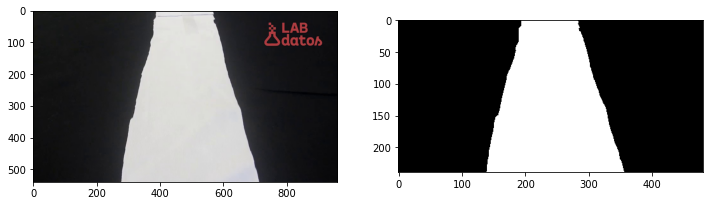

In [5]:
#probar la binarizacion en una imagen del video
img = cv.imread('figuras/imagen_0.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_bin = binarizacion(img)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_bin,cmap='gray')
plt.show()

In [6]:
#Agregar el video de la binarización
video = cv.VideoCapture('videos/video_carretera.mp4')
while(video.isOpened()):
    ret, frame = video.read()
    if ret:
        cv.imshow("video original", frame)
        img_bin=binarizacion(frame)
        cv.imshow("video binarizado", img_bin)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    
    else:
        break
        
video.release()
cv.destroyAllWindows()

# Agregar la función de área de interés

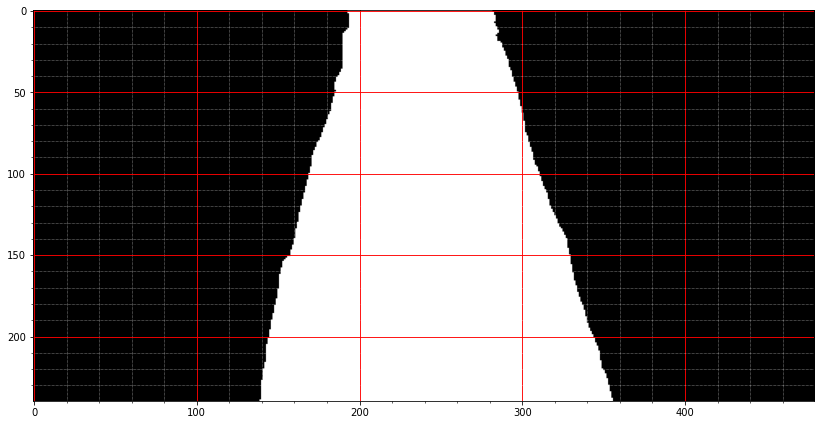

In [7]:
#probar la binarizacion en una imagen del video
img = cv.imread('figuras/imagen_0.jpg')
img_bin = binarizacion(img)
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(img_bin,cmap='gray')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')

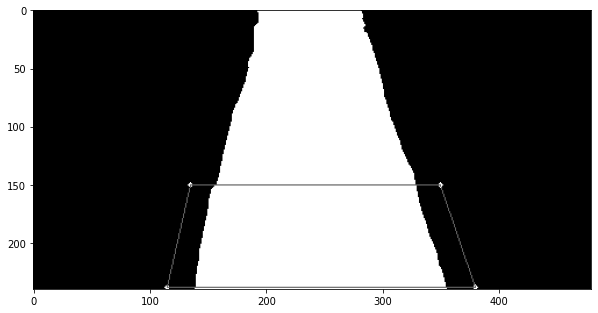

In [8]:
#Marcamos el área de interés con puntos y un polígono
img = cv.imread('figuras/imagen_0.jpg')
img_bin = binarizacion(img)
plt.figure(figsize=(10,7))
cv.circle(img_bin, (135, 150), 2, (255, 0,0 ), -1) ;
cv.circle(img_bin, (350, 150), 2 ,(255, 0, 0), -1) ;
cv.circle(img_bin, (115, 238), 2, (255, 0, 0), -1) ;
cv.circle(img_bin, (380, 238), 2, (255, 0, 0), -1) ;

pts_poligono = np.array([[135, 150], [350, 150], [380, 238], [115, 238]], np.int32)
pts_poligono = pts_poligono.reshape((-1,1,2))
cv.polylines(img_bin,[pts_poligono],True,(100,100,100))
plt.imshow(img_bin,cmap='gray')
plt.show()

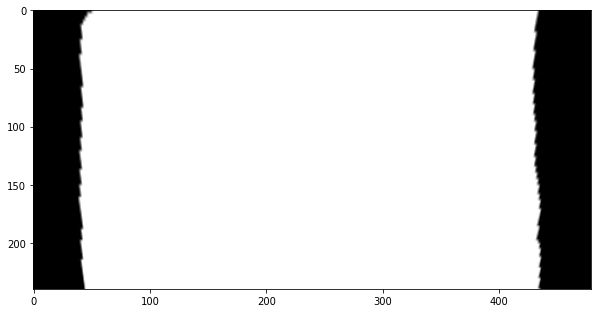

In [9]:
#Obteniendo la matriz de transformación y cambiando de perspectiva
img = cv.imread('figuras/imagen_0.jpg')
img_bin = binarizacion(img)
pts1 = np.float32([[135, 150], [350, 150], [115, 238], [380, 238]])
pts2 = np.float32([[0, 0], [480, 0], [0, 240], [480, 240]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
img_warp = cv.warpPerspective(img_bin, matrix, (480, 240))
plt.figure(figsize=(10,7))
plt.imshow(img_warp,cmap='gray')
plt.show()

In [10]:
#Funcion de área de interés
def area_interes(imagen):
    pts1 = np.float32([[135, 150], [350, 150], [115, 238], [380, 238]])
    pts2 = np.float32([[0, 0], [480, 0], [0, 240], [480, 240]])
    matrix = cv.getPerspectiveTransform(pts1, pts2)
    img_warp = cv.warpPerspective(imagen, matrix, (480, 240))
    return (img_warp)

In [11]:
#Agregar la funcion de área de interés
video = cv.VideoCapture('videos/video_carretera.mp4')
while(video.isOpened()):
    ret, frame = video.read()
    if ret:
        alto= frame.shape[0]
        ancho= frame.shape[1]
        ratio=0.8
        frame =cv.resize(frame, ( int(ancho*ratio) , int(alto*ratio) ), interpolation=cv.INTER_NEAREST )
        time.sleep(0.002)
        
        
        cv.imshow("video", frame)
        img_bin=binarizacion(frame)
        cv.polylines(img_bin,[pts_poligono],True,(100,100,100))
        cv.imshow("video binarizado", img_bin)
        img_interes=area_interes(img_bin)
        cv.imshow("video area interes", img_interes)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break
video.release()
cv.destroyAllWindows()

# Agregar el punto medio al área de interés.

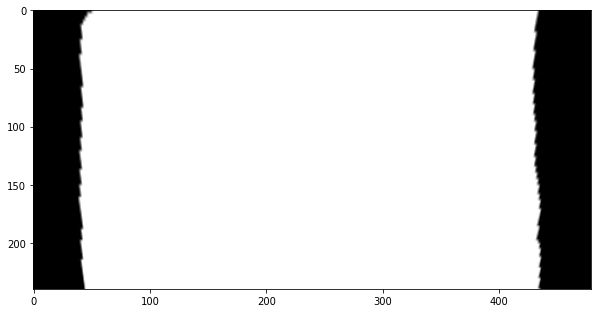

In [12]:
# Visualizamos del área de interés
img = cv.imread('figuras/imagen_0.jpg')
img_bin = binarizacion(img)
img_interes=area_interes(img_bin)
plt.figure(figsize=(10,7))
plt.imshow(img_interes,cmap='gray')
plt.show()

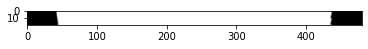

In [13]:
#Region cercana al observador
img_cercana= img_interes[220:, :]
plt.imshow(img_cercana,cmap='gray')
plt.show()

In [14]:
#Suma de cada columna
suma_columnas = img_cercana.sum(axis=0)
suma_columnas

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  112, 1036, 2757,
       4366, 5084, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100,
       5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100,
       5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100,
       5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100,
       5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100,
       5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100,
       5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100,
       5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100,
       5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100, 5100,
       5100, 5100, 5100, 5100, 5100, 5100, 5100, 51

In [15]:
#Encontramos el punto medio
x_index = np.arange(len(suma_columnas))
mid_point=int( np.dot(x_index,suma_columnas) / np.sum( suma_columnas ) )
mid_point

239

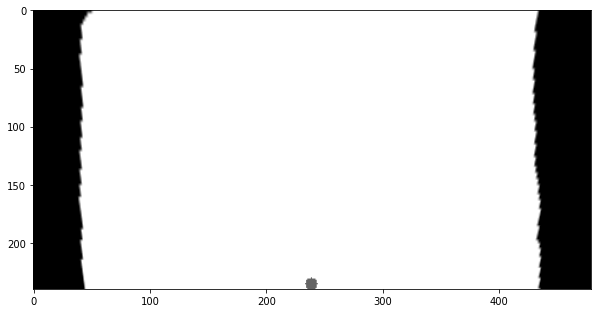

In [16]:
#Colocamos el punto medio en la imagen del área de interés
img = cv.imread('figuras/imagen_0.jpg')
img_bin = binarizacion(img)
img_interes=area_interes(img_bin)
plt.figure(figsize=(10,7))
cv.circle(img_interes, (mid_point,235), 5, (100, 100,100 ), -1) ;
plt.imshow(img_interes,cmap='gray')
plt.show()

In [17]:
#Función para encontrar el punto medio
def punto_medio(imagen):
    img_cercana= imagen[220:, :]
    suma_columnas = img_cercana.sum(axis=0)
    x_pos = np.arange(len(suma_columnas))
    mid_point=int( np.dot(x_pos,suma_columnas) / np.sum( suma_columnas ) )
    return mid_point

In [18]:
#Implementacion del punto medio en el video
video = cv.VideoCapture('videos/video_carretera.mp4')
while(video.isOpened()):
    ret, frame = video.read()
    if ret:
        alto= frame.shape[0]
        ancho= frame.shape[1]
        ratio=0.8
        frame =cv.resize(frame, ( int(ancho*ratio) , int(alto*ratio) ), interpolation=cv.INTER_NEAREST )
        time.sleep(0.002)
        cv.imshow("video", frame)
        img_bin=binarizacion(frame)
        cv.polylines(img_bin,[pts_poligono],True,(100,100,100))
        cv.imshow("video binarizado", img_bin)
        img_interes=area_interes(img_bin)
        mid_point = punto_medio(img_interes)
        cv.circle(img_interes, (mid_point, 235), 5, (100,100,100), -1) ;
        cv.imshow("video area interes", img_interes)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break
video.release()
cv.destroyAllWindows()